In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Exploratory Data Analysis

In [2]:
"""
Initializing the dataset and check all features.
"""
ObesityData = pd.read_csv("ObesityDataSet.csv")
ObesityData.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The feature "Nobeyesdad" is a categorical type of variable that in this case indicates the level of obesity or the type of weight level an individual is in. The categories range from insufficient weight to obesity type III.

In [3]:
"""
weightType pd.Series for the graph below,
this graph totals the instances of each weight level
"""
weightType = pd.DataFrame(ObesityData.get("NObeyesdad")).value_counts()

### weightTypeGender will be used in the a later section ###
weightTypeGender = pd.DataFrame(ObesityData.get(["NObeyesdad", "Gender"]))

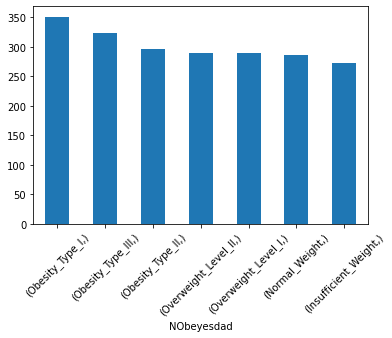

In [4]:
weightType.plot.bar(rot = 45)

In this graph we can see which weight levels are the most prominent in the dataset, which sampled individuals from Mexico, Peru and Colombia. Here we notice that obesity type I among the sample was the most common weight type with insuficcient being the least commom. However, it is clear that the dataset equally portray all type of weight levels in its sample.

In [5]:
"""
Cheack for any NaN values in the data set
"""
if ObesityData.isnull().sum().sum() == 0:
    print("No NaN values")
else:
    print(ObesityData.isnull().sum().sum(), " NaN values")

No NaN values


No NaN values allows us to significanlty reduce the amount of time to clean the data.

### Visualizing variable correlation

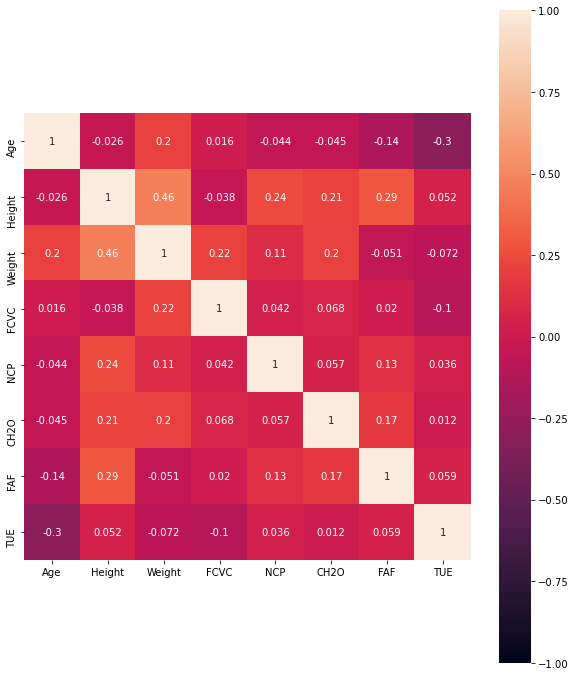

In [6]:
"""
Correlation matrix for all non-categorical featues in the dataset
"""
ObCorr = ObesityData.corr()
plt.subplots(figsize=(10,12))
sns.heatmap(ObCorr, vmax=1, vmin=-1, square=True, cbar=True, annot=True)

In this correlation matrix we can determine the most correlated variables in the dataset. Among all the non-categorical
variables we can see that the most correlated are:
    - Age and TUE (Time using technology in hours per day)
    - Height and Weight
    - Height and FAF (Physical activity frequency)

In [7]:
"""
removing all other non significant features from the data.
Encode Female as '0' and Male as '1'
"""
ObesityData = ObesityData.drop(["SCC", "family_history_with_overweight", "FAVC", "FCVC",
                 "NCP", "CAEC", "SMOKE", "CH2O", "CALC", "MTRANS", "NObeyesdad"], axis=1)
encodeGender = {"Gender": {"Female": 0, "Male": 1}}
ObesityData = ObesityData.replace(encodeGender)
ObesityData.head()

,Gender,Age,Height,Weight,FAF,TUE
0,0,21.0,1.62,64.0,0.0,1.0
1,0,21.0,1.52,56.0,3.0,0.0
2,1,23.0,1.80,77.0,2.0,1.0
3,1,27.0,1.80,87.0,2.0,0.0
4,1,22.0,1.78,89.8,0.0,0.0


After cleaning the dataset these are the continuous variables we believe we should be taking a look at.

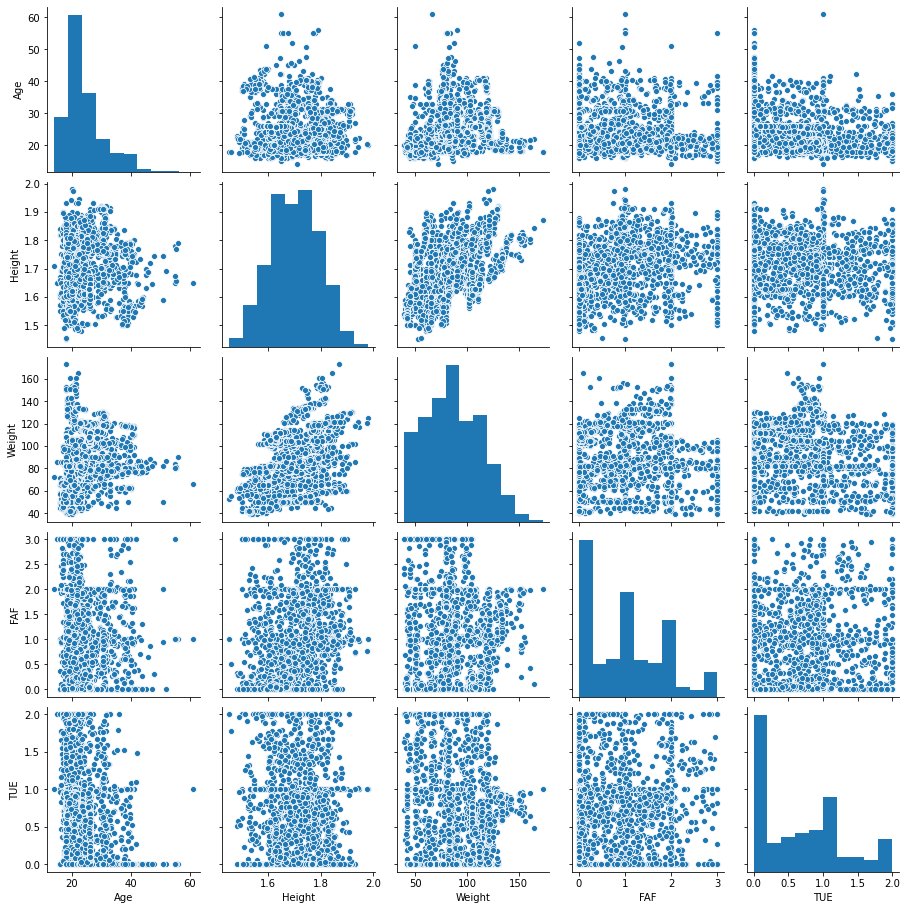

In [8]:
"""
Pair plot of current features except Gender as 
that would not benefit from this graph.
"""
sns.pairplot(ObesityData.drop(["Gender"], axis=1))

- Age has a rightward skew in its distribution, this tells us older people may be underrepresented.

- Height is normally distributed

- Weight also has a bit right skew to it.

- FAF and TUE have much larger spreads all around and don't give us much information aside from the
  mode in both cases being 0, meaning many indivuduals that were sampled claimed very no physical activity and no
  no time spent using technology.
  

In [9]:
"""
Female: 0
Male:   1
"""
ObesityData['Gender'].value_counts()

1    1068
0    1043
Name: Gender, dtype: int64

Here we take a look at the only categorical feature we preserved, and we can see that both female and male account for
about 50% of the sample size. Males having 25 more.

### Visualization by gender

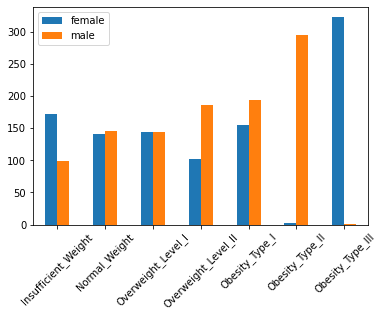

In [10]:
"""
Creating the new dataframe to visualize male and female weight
level differences across the sample.
"""
female = weightTypeGender[weightTypeGender.get("Gender") == "Female"]
female = female.get("NObeyesdad").value_counts()

male = weightTypeGender[weightTypeGender.get("Gender") == "Male"]
male = male.get("NObeyesdad").value_counts()

index = ["Insufficient_Weight", "Normal_Weight", "Overweight_Level_I", 
      "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"]

weightTypeGender = pd.DataFrame({'female': female, 'male' : male}, index = index)
weightTypeGender.plot.bar(rot=45)

Observations to take away from this graph are that, on females tend to fall more in the insufficient weight category and obesity type III than males However, in the overweight and obesity categories males tend to have a  much higher presence that females. That last to columns are interesting because males massively dominate obesity type II where as females similarly dominate the obesity type III category.